/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Stride = 1, Padding = 'valid':
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Stride = 1, Padding = 'same':
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Stride = 2, Padding = 'valid':
[[0. 0.]
 [0. 0.]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Stride = 2, Padding = 'same':
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]

Last performed: Stride = 2, Padding = 'same':
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]



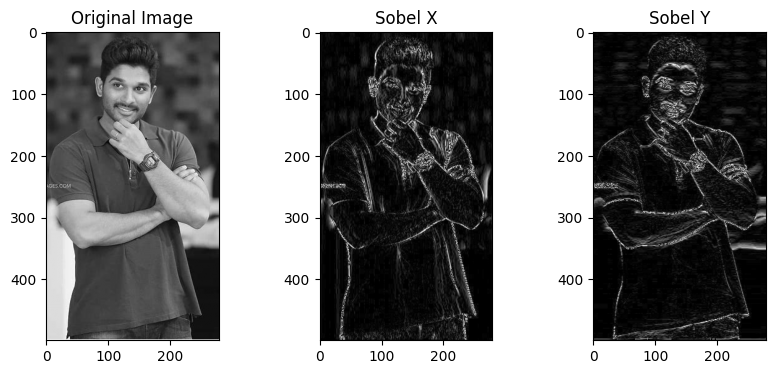

Original Matrix:
 [[0.15292345 0.40640183 0.0741673  0.3025039 ]
 [0.3346363  0.88988471 0.63953299 0.43813322]
 [0.80191139 0.60290337 0.4730577  0.53862319]
 [0.9733861  0.14867593 0.11582438 0.00824313]]
Max Pooled Matrix:
 [[0.8898847 0.639533 ]
 [0.9733861 0.5386232]]
Average Pooled Matrix:
 [[0.4459616  0.36358434]
 [0.63171923 0.2839371 ]]
Original Accuracy: 1.0
Min-Max Normalized Accuracy: 0.9666666666666667
Standardized Accuracy: 1.0


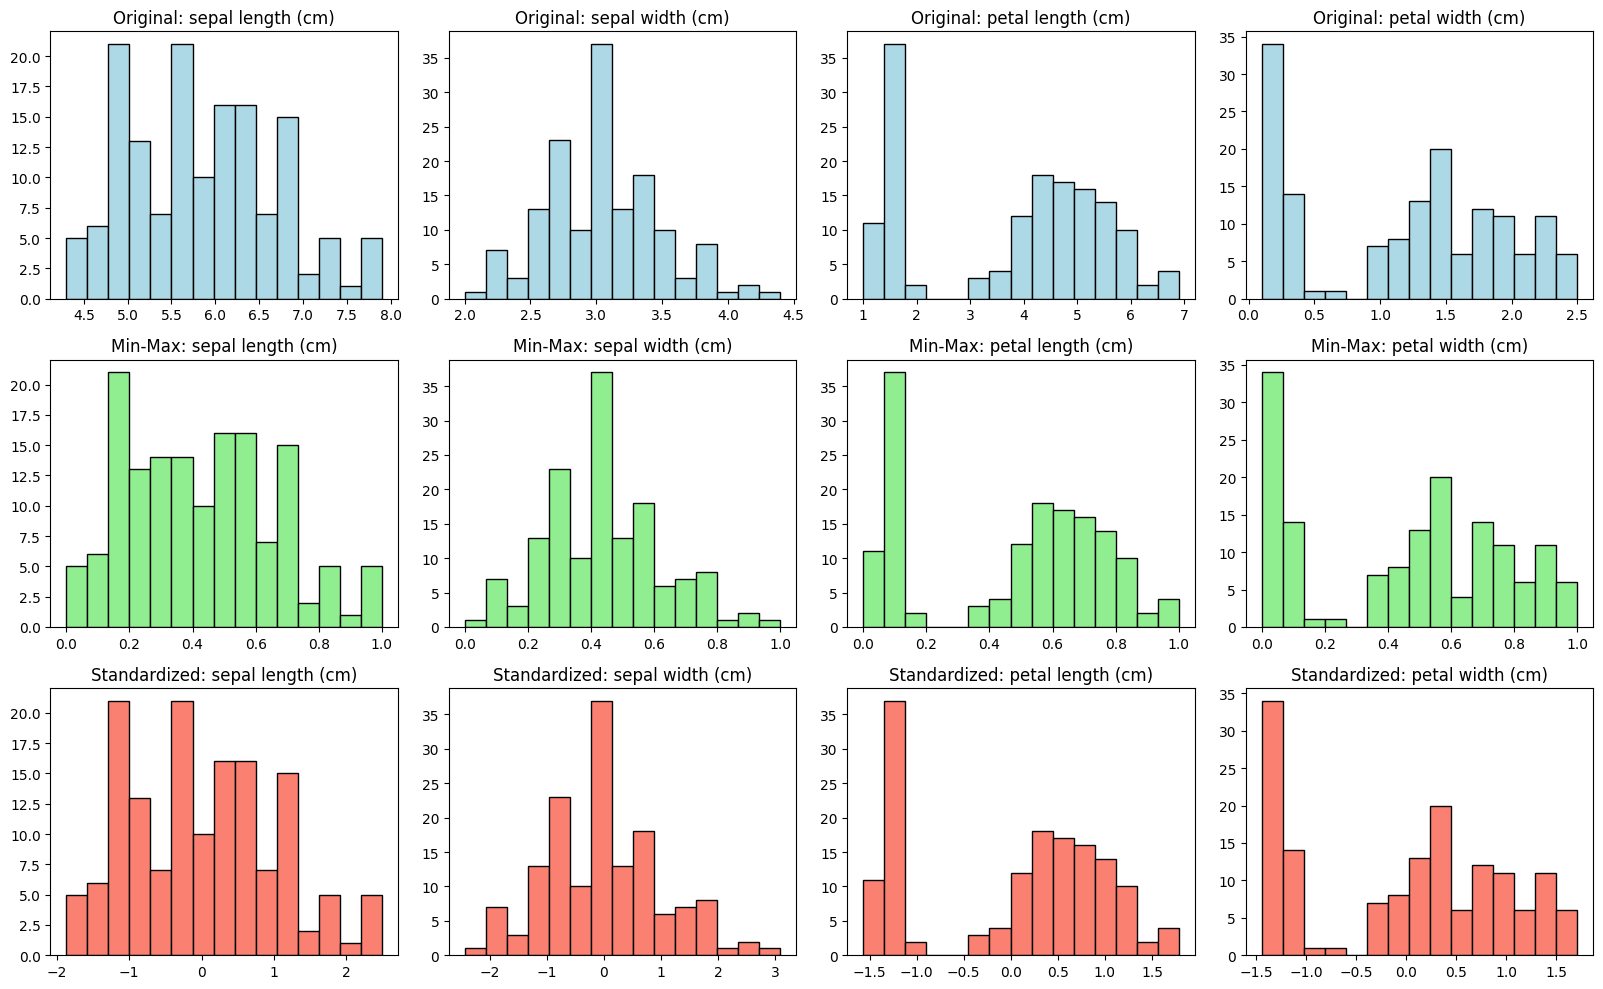


Use **Normalization** when you need to scale features to a fixed range (like [0, 1]), especially for neural networks using sigmoid or tanh.

Use **Standardization** when the data follows a normal distribution or has outliers, often better for models using ReLU or when input varies a lot in scale.



In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

# QUESTION 1 : Convolution Operations with Different Parameters


# 1, Define the input matrix
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
]).reshape(1, 5, 5, 1)  # Reshape for Conv2D (batch_size, height, width, channels)

# 2, Define the kernel
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]).reshape(3, 3, 1, 1)  # Reshape for Conv2D (height, width, in_channels, out_channels)

# 3,Function to perform convolution and print the output
def perform_convolution(input_matrix, kernel, stride, padding):
    model = Sequential()
    model.add(Conv2D(1, kernel_size=(3, 3), strides=(stride, stride), padding=padding,
                     input_shape=(input_matrix.shape[1], input_matrix.shape[2], input_matrix.shape[3])))
    model.compile(optimizer='adam', loss='mse') # Compile the model
    model.layers[0].set_weights([kernel, np.zeros(1)]) # Set weights (kernel and bias)
    output = model.predict(input_matrix)
    print(f"Stride = {stride}, Padding = '{padding}':\n{output.squeeze()}\n")
    # Return the values so they can be used outside the function
    return stride, padding, output

# 4, Perform convolution with different parameters and store the last values
stride, padding, output = perform_convolution(input_matrix, kernel, stride=1, padding='valid')
stride, padding, output = perform_convolution(input_matrix, kernel, stride=1, padding='same')
stride, padding, output = perform_convolution(input_matrix, kernel, stride=2, padding='valid')
stride, padding, output = perform_convolution(input_matrix, kernel, stride=2, padding='same')

# Now stride, padding, and output from the last call are accessible
print(f"Last performed: Stride = {stride}, Padding = '{padding}':\n{output.squeeze()}\n")



#Question 2: CNN Feature Extraction with Filters and Pooling

#task 1

import cv2
import numpy as np
import matplotlib.pyplot as plt

 # Load a grayscale image
image_path = 'pic1.jpg'  # Ensure this path is correct
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

 # Check if the image was loaded correctly
if image is None:
  print(f"Error: Unable to load image at {image_path}")
exit()

  # Apply Sobel filter in x and y directions

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

 # Convert the filtered images to absolute values and then to uint8
sobel_x = np.uint8(np.absolute(sobel_x))
sobel_y = np.uint8(np.absolute(sobel_y))
 # Display the images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')
plt.show()


#task 2 :Implement Max Pooling and Average Pooling

import tensorflow as tf
import numpy as np
 # Create a random 4x4 matrix
input_matrix = np.random.rand(1, 4, 4, 1)  # Reshape for Conv2D (batch_size, height, width,
 # Define Max Pooling and Average Pooling
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
 # Apply pooling operations
max_pooled = max_pool(input_matrix)
avg_pooled = avg_pool(input_matrix)
 # Print the results
print("Original Matrix:\n", input_matrix.squeeze())
print("Max Pooled Matrix:\n", max_pooled.numpy().squeeze())
print("Average Pooled Matrix:\n", avg_pooled.numpy().squeeze())


#Question 3:
# Q3: Data Preprocessing - Standardization vs. Normalization

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Apply Min-Max Normalization
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

# Apply Z-score Standardization
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

# Convert to DataFrames for plotting
df_original = pd.DataFrame(X, columns=feature_names)
df_minmax = pd.DataFrame(X_minmax, columns=feature_names)
df_standard = pd.DataFrame(X_standard, columns=feature_names)

# Function to train logistic regression and return accuracy
def train_and_evaluate(X_data, y_data):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Evaluate all datasets
acc_original = train_and_evaluate(X, y)
acc_minmax = train_and_evaluate(X_minmax, y)
acc_standard = train_and_evaluate(X_standard, y)

# Print accuracies
print("Original Accuracy:", acc_original)
print("Min-Max Normalized Accuracy:", acc_minmax)
print("Standardized Accuracy:", acc_standard)

# Plot histograms to compare distributions
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(16, 10))

for i, col in enumerate(feature_names):
    axes[0, i].hist(df_original[col], bins=15, color='lightblue', edgecolor='black')
    axes[0, i].set_title(f'Original: {col}')

    axes[1, i].hist(df_minmax[col], bins=15, color='lightgreen', edgecolor='black')
    axes[1, i].set_title(f'Min-Max: {col}')

    axes[2, i].hist(df_standard[col], bins=15, color='salmon', edgecolor='black')
    axes[2, i].set_title(f'Standardized: {col}')

plt.tight_layout()
plt.show()

#Explain in which scenarios normalization vs. standardization is preferable for deep learning.

print("""
Use **Normalization** when you need to scale features to a fixed range (like [0, 1]), especially for neural networks using sigmoid or tanh.

Use **Standardization** when the data follows a normal distribution or has outliers, often better for models using ReLU or when input varies a lot in scale.
""")









